In [10]:
# set the root id of the cell
rid = 864691135162983725

In [2]:
from caveclient import CAVEclient
import imageryclient as ic
import PIL
from PIL import Image
import numpy as np
from scipy import ndimage

datastack_name = 'minnie65_public_v661'
client = CAVEclient(datastack_name)

img_client = ic.ImageryClient(client=client)




/Users/wanqing.yu/anaconda3/envs/EM/lib/python3.11/site-packages/python_jsonschema_objects/__init__.py:113: UserWarning: Schema id not specified. Defaulting to 'self'
  warnings.warn("Schema id not specified. Defaulting to 'self'")


In [3]:
# center point for segmentation cutouts
ctr = [287444.75, 198354.5,  19595.975] #304176, 263880, 23199 #[240640, 207872, 21360]

# bounding box for cutout
img_width = 1024
bounds = ic.bounds_from_center(ctr, width=img_width, height=img_width, depth=1)

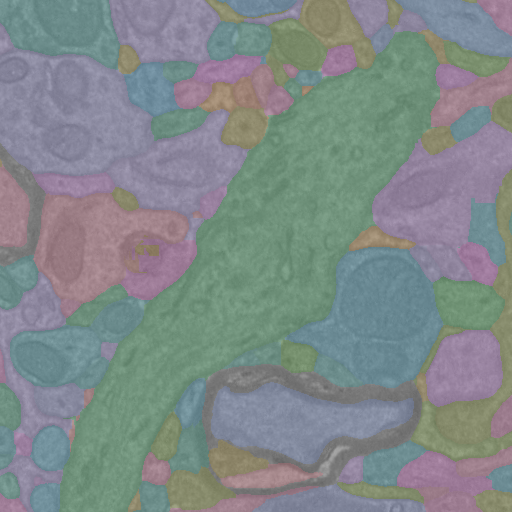

In [4]:
# download raw EM image and segmentation
image, segs = img_client.image_and_segmentation_cutout(ctr,
                                                       bbox_size=(img_width, img_width),
                                                       #scale_to_bounds=True,
                                                       #root_ids = rid,
)
ic.composite_overlay(segs, imagery=image,  palette='husl') #outline=True, alpha=0.5, width=1,

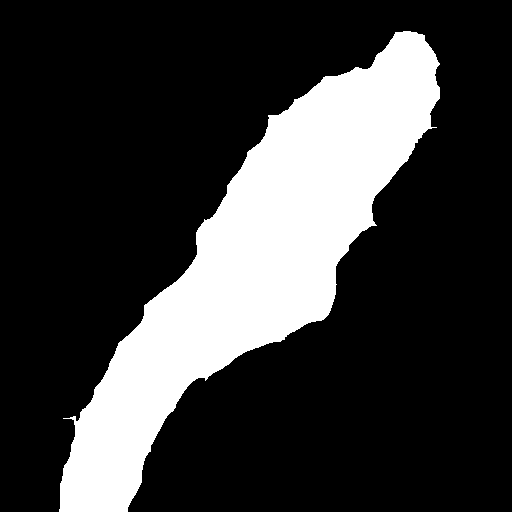

In [5]:
# download segmentation for the rid only

seg_rid = img_client.segmentation_cutout(bounds, root_ids = rid)
Image.fromarray( (seg_rid.T / np.max(seg_rid) * 255).astype('uint8') )

In [6]:
# calculate binary masks
bseg = seg_rid > 0
# dilating the segmentation data
seg_new = ndimage.binary_dilation(
    bseg, iterations=int(3), border_value=0)
# get the dilated outline of the segmentation
seg_new[bseg] = 0

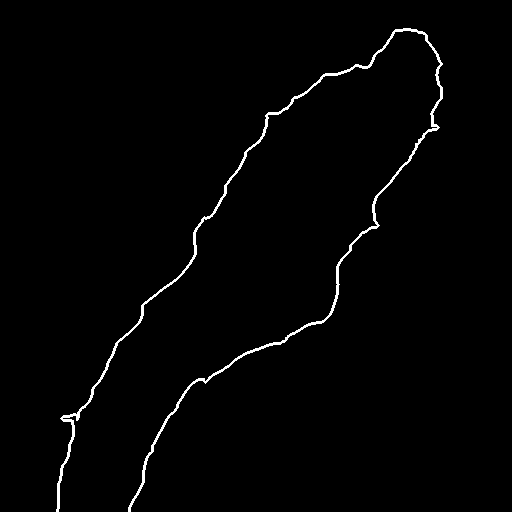

In [7]:
Image.fromarray(seg_new.T)

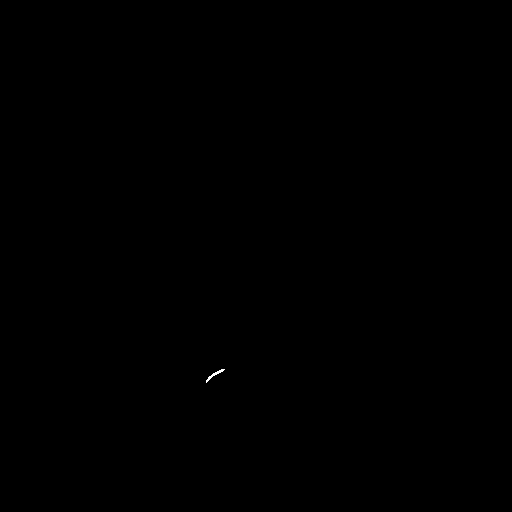

In [8]:
# cut out all segmentation data (seg_all == 0 indicates myelin and others unsegmented stuff)
seg_all = img_client.segmentation_cutout(bounds)
# calculate binary masks
seg_0 = seg_all == 0
# dilated outline falls on seg_all is 0
seg_mylin = seg_0 & seg_new
Image.fromarray(seg_mylin.T)

In [9]:
# Calculate the metric (percentage of pixels where seg_all is 0)
metric = np.sum(seg_all[seg_new] == 0) / len(seg_new[seg_new == True]) * 100
metric

1.5633724176437744